In [1]:
import json
import pandas as pd
import requests
import config

In [2]:
# pages = []
# for i in range(1,89):
#     pages.append(str(f'https://api.themoviedb.org/3/search/movie?&query=family&api_key=16d56b820f137fb6143fd18e3dfd258d&page={i}'))
# # accessing    

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# df1 = df.sort_values(by = 'popularity',ascending=False)
#Popularity is calculated by 
# Number of votes for the day
# Number of views for the day
# Number of users who marked it as a "favourite" for the day
# Number of users who added it to their "watchlist" for the day
# Release date
# Number of total votes
# Previous days score

In [5]:
pages2 = []
for i in range(1,501):
    pages2.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&page={i}&with_genres=12&with_original_language=en'))

In [6]:
#pages2

In [7]:
adv_movies = []
# i am adding all the pages(get request) into a new list 
for page in pages2:
    adv_movies.append(requests.get(page))

In [8]:
adv_json = []
for movie in adv_movies:
    adv_json.append(movie.json())
    

In [9]:
#adv_json

In [10]:
results = []
for item in adv_json:
    results = results + item['results']

In [11]:
df1 = pd.DataFrame(results)

In [12]:
df1.set_index('title', inplace = True)

In [13]:
df1.reset_index(inplace=True)

In [14]:
df1.head(30)

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,Jumanji: The Next Level,267.705,1938,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
1,Ad Astra,261.579,2494,False,/xBHvZcjRiWyobQ9kxBhO6B2dtRI.jpg,419704,False,/5BwqwxMEjeFtdknRV792Svo0K1v.jpg,en,Ad Astra,"[12, 18, 9648, 878, 53]",6.0,"The near future, a time when both hope and har...",2019-09-17
2,Frozen II,145.510,2626,False,/pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg,330457,False,/xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg,en,Frozen II,"[12, 16, 10751]",7.1,"Elsa, Anna, Kristoff and Olaf head far into th...",2019-11-20
3,Spies in Disguise,104.718,234,False,/30YacPAcxpNemhhwX0PVUl9pVA3.jpg,431693,False,/qlYxtqVfu2LOdvYMMDPCSGX0Oz0.jpg,en,Spies in Disguise,"[28, 12, 16, 35]",7.3,Super spy Lance Sterling and scientist Walter ...,2019-12-24
4,Charlie's Angels,99.886,561,False,/1DPUFG6QnGqzpvEaDEv7TaepycM.jpg,458897,False,/a0xTB1vBxMGt6LGG4N7k1wO9lfL.jpg,en,Charlie's Angels,"[28, 12, 35]",6.4,When a systems engineer blows the whistle on a...,2019-11-14
5,Avengers: Infinity War,84.390,16905,False,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,299536,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,en,Avengers: Infinity War,"[28, 12, 878]",8.3,As the Avengers and their allies have continue...,2018-04-25
6,The Call of the Wild,76.884,142,False,/33VdppGbeNxICrFUtW2WpGHvfYc.jpg,481848,False,/yFRpUmsreYO5Bc0HVBTsJsHIIox.jpg,en,The Call of the Wild,"[28, 12, 16, 18, 878, 10751]",5.9,Buck is a big-hearted dog whose blissful domes...,2020-02-19
7,Onward,60.374,31,False,/3VqDLgKLfNYSQYEGC5sjGhcPhn7.jpg,508439,False,/bcT8CaBIj086WVD7K529h78eujb.jpg,en,Onward,"[12, 16, 35, 14, 10751]",7.8,"In a suburban fantasy world, two teenage elf b...",2020-02-29
8,Star Wars: The Rise of Skywalker,52.708,3061,False,/db32LaOibwEliAmSL2jjDF6oDdj.jpg,181812,False,/jOzrELAzFxtMx2I4uDGHOotdfsS.jpg,en,Star Wars: The Rise of Skywalker,"[28, 12, 878]",6.5,The surviving Resistance faces the First Order...,2019-12-18
9,Frozen,41.184,11204,False,/eFnGmj63QPUpK7QUWSOUhypIQOT.jpg,109445,False,/cN9Nbwh66TRcj2gBE8cSEZulsx3.jpg,en,Frozen,"[12, 16, 10751]",7.3,Young princess Anna of Arendelle dreams about ...,2013-11-27


In [15]:
df_adv = df1[['title','popularity']].head(20) 
df_adv

,title,popularity
0,Jumanji: The Next Level,267.705
1,Ad Astra,261.579
2,Frozen II,145.510
3,Spies in Disguise,104.718
4,Charlie's Angels,99.886
5,Avengers: Infinity War,84.390
6,The Call of the Wild,76.884
7,Onward,60.374
8,Star Wars: The Rise of Skywalker,52.708
9,Frozen,41.184


In [16]:
df_adv['popularity']

0     267.705
1     261.579
2     145.510
3     104.718
4      99.886
5      84.390
6      76.884
7      60.374
8      52.708
9      41.184
10     61.253
11     42.049
12     52.654
13     48.934
14     47.914
15     40.758
16     49.851
17     38.290
18     39.117
19     37.669
Name: popularity, dtype: float64

In [17]:
df_adv['title']

0                       Jumanji: The Next Level
1                                      Ad Astra
2                                     Frozen II
3                             Spies in Disguise
4                              Charlie's Angels
5                        Avengers: Infinity War
6                          The Call of the Wild
7                                        Onward
8              Star Wars: The Rise of Skywalker
9                                        Frozen
10                                         Cars
11                    Spider-Man: Far from Home
12                 Maleficent: Mistress of Evil
13                                      Aladdin
14                               No Time to Die
15                                The Lion King
16                                     Dolittle
17    The Hobbit: The Battle of the Five Armies
18                           Terminator Genisys
19            Spider-Man: Into the Spider-Verse
Name: title, dtype: object

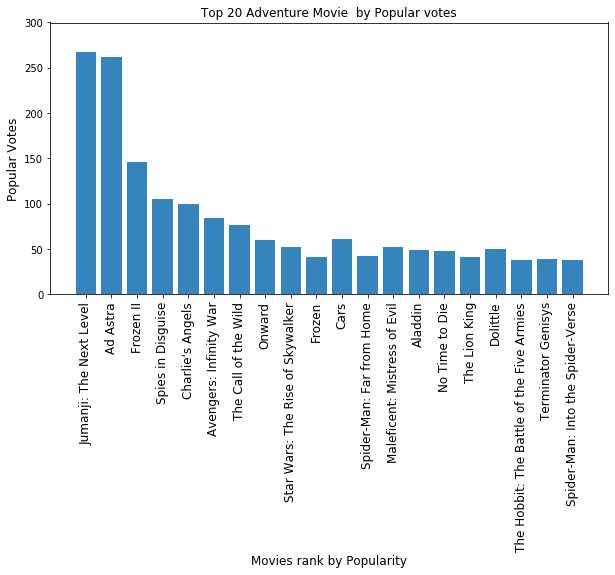

In [203]:
new_figure = plt.figure(figsize= (10,5))
objects = df_adv['title']
# y_pos = np.arange(len(objects))
popularity= df_adv['popularity']

plt.bar(objects, popularity, align='center', alpha=.9 )
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
plt.yticks(np.arange(0, 301, step=50))
plt.ylabel('Popular Votes',fontsize=12)
plt.xlabel('Movies rank by Popularity',fontsize=12)
plt.title('Top 20 Adventure Movie  by Popular votes',fontsize=12)

plt.show()

In [121]:
pages3 = []
for i in range(1,501):
    pages3.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&page={i}&with_genres=35&with_original_language=en'))

In [122]:
comedy_movies = []
# i am adding all the pages(get request) into a new list 
for page in pages3:
    comedy_movies.append(requests.get(page))

In [123]:
comedy_json = []
for movie in comedy_movies:
    comedy_json.append(movie.json())

In [124]:
results = []
for item in comedy_json:
    results = results + item['results']

In [125]:
df2 = pd.DataFrame(results)

In [126]:
df2.set_index('title', inplace = True)

In [127]:
df2.reset_index(inplace=True)

In [128]:
df2.head(30)

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,A Rainy Day in New York,1194.115,597,False,/uPGq1mkEXznUpapDmOSxbsybjfp.jpg,475303,False,/6fkqwqLEcDZOEAnBBfKAniwNxtx.jpg,en,A Rainy Day in New York,"[35, 10749]",6.7,Two young people arrive in New York to spend a...,2019-07-26
1,Jumanji: The Next Level,267.705,1938,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
2,Sonic the Hedgehog,205.794,568,False,/aQvJ5WPzZgYVDrxLX4R6cLJCEaQ.jpg,454626,False,/qonBhlm0UjuKX2sH7e73pnG0454.jpg,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",7.2,Based on the global blockbuster videogame fran...,2020-02-12
3,Spies in Disguise,104.718,234,False,/30YacPAcxpNemhhwX0PVUl9pVA3.jpg,431693,False,/qlYxtqVfu2LOdvYMMDPCSGX0Oz0.jpg,en,Spies in Disguise,"[28, 12, 16, 35]",7.3,Super spy Lance Sterling and scientist Walter ...,2019-12-24
4,Charlie's Angels,99.886,561,False,/1DPUFG6QnGqzpvEaDEv7TaepycM.jpg,458897,False,/a0xTB1vBxMGt6LGG4N7k1wO9lfL.jpg,en,Charlie's Angels,"[28, 12, 35]",6.4,When a systems engineer blows the whistle on a...,2019-11-14
5,Knives Out,83.715,2495,False,/pThyQovXQrw2m0s9x82twj48Jq4.jpg,546554,False,/cjTQSwcsfVdirSFSHNBXRGkxmWa.jpg,en,Knives Out,"[35, 80, 18, 9648, 53]",7.8,When renowned crime novelist Harlan Thrombey i...,2019-11-27
6,Guns Akimbo,79.446,43,False,/2kNnf7BwRCEm4bcFkdiE0T4U25s.jpg,457335,False,/gL7TV2g9y9p3v7occ5bLrJ2p1qs.jpg,en,Guns Akimbo,"[28, 35]",6.2,An ordinary guy suddenly finds himself forced ...,2020-02-27
7,Birds of Prey (and the Fantabulous Emancipatio...,93.026,936,False,/h4VB6m0RwcicVEZvzftYZyKXs6K.jpg,495764,False,/uozb2VeD87YmhoUP1RrGWfzuCrr.jpg,en,Birds of Prey (and the Fantabulous Emancipatio...,"[28, 35, 80]",6.8,"After her breakup with the Joker, Harley Quinn...",2020-02-05
8,Jojo Rabbit,65.884,2221,False,/7GsM4mtM0worCtIVeiQt28HieeN.jpg,515001,False,/agoBZfL1q5G79SD0npArSlJn8BH.jpg,en,Jojo Rabbit,"[35, 18, 10752]",8.1,A World War II satire that follows a lonely Ge...,2019-10-18
9,Onward,60.374,31,False,/3VqDLgKLfNYSQYEGC5sjGhcPhn7.jpg,508439,False,/bcT8CaBIj086WVD7K529h78eujb.jpg,en,Onward,"[12, 16, 35, 14, 10751]",7.8,"In a suburban fantasy world, two teenage elf b...",2020-02-29


In [129]:
df2.drop(df2[df2['popularity'] > 1000.0].index, inplace = True)

In [131]:
df_com = df2[['title','popularity']].head(20) 
df_com

,title,popularity
1,Jumanji: The Next Level,267.705
2,Sonic the Hedgehog,205.794
3,Spies in Disguise,104.718
4,Charlie's Angels,99.886
5,Knives Out,83.715
6,Guns Akimbo,79.446
7,Birds of Prey (and the Fantabulous Emancipatio...,93.026
8,Jojo Rabbit,65.884
9,Onward,60.374
10,Zombieland: Double Tap,39.758


In [132]:
df_com.describe()

,popularity
count,20.000000
mean,77.186950
std,59.725565
min,33.062000
25%,42.142250
50%,55.935500
75%,86.042750
max,267.705000


In [ ]:
# In certain cases the median would be best to test for skewed data. 
# The mean is the average of the data. We can see the mean and median are very similiar therefore 
# we can see there is a symmetrical distribution. 

In [133]:
df_com['popularity']

1     267.705
2     205.794
3     104.718
4      99.886
5      83.715
6      79.446
7      93.026
8      65.884
9      60.374
10     39.758
11     61.253
12     51.497
13     48.834
14     33.062
15     48.934
16     49.851
17     37.669
18     42.937
19     34.520
20     34.876
Name: popularity, dtype: float64

In [134]:
df_com['title']

1                               Jumanji: The Next Level
2                                    Sonic the Hedgehog
3                                     Spies in Disguise
4                                      Charlie's Angels
5                                            Knives Out
6                                           Guns Akimbo
7     Birds of Prey (and the Fantabulous Emancipatio...
8                                           Jojo Rabbit
9                                                Onward
10                               Zombieland: Double Tap
11                                                 Cars
12                       Once Upon a Time… in Hollywood
13                                    The Addams Family
14                                             Hustlers
15                                              Aladdin
16                                             Dolittle
17                    Spider-Man: Into the Spider-Verse
18                    To All the Boys I've Loved

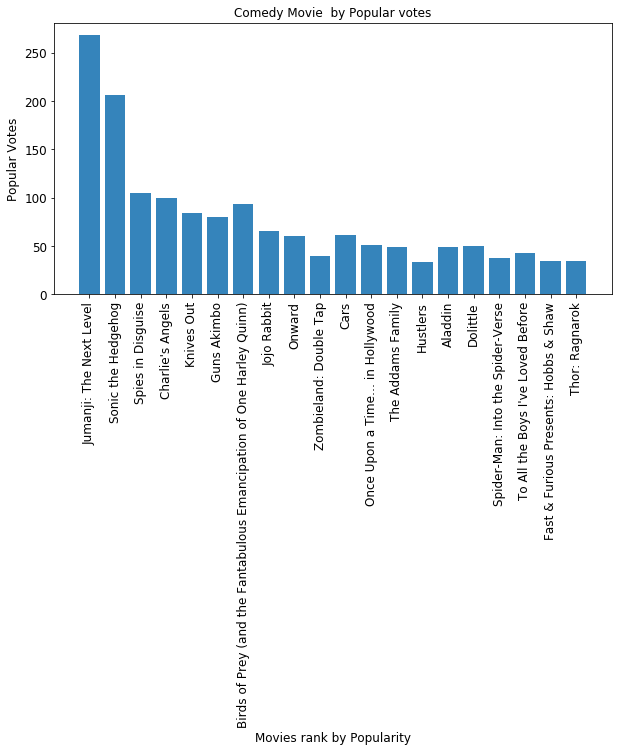

In [204]:
new_figure = plt.figure(figsize= (10,5))
objects = df_com['title']
# y_pos = np.arange(len(objects))
popularity= df_com['popularity']

plt.bar(objects, popularity, align='center', alpha=0.9)
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
plt.yticks(np.arange(1, 300, step=50),fontsize=12)
plt.ylabel('Popular Votes',fontsize=12)
plt.xlabel('Movies rank by Popularity',fontsize=12)
plt.title('Comedy Movie  by Popular votes',fontsize=12)

plt.show()

In [32]:
revenue_adv = []
for i in range(1,20):
    revenue_adv.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=revenue.desc&page={i}&with_genres=12&with_original_language=en'))
    
#revenue of adventure movie  
#we already sorted by revenue in a desending order

#Box office business can be measured in the terms of the number of tickets sold or the amount of
#money raised by ticket sales (revenue). The projection and analysis of these earnings is very important for 
#the creative industries and often a source of interest for fans. This is predominant in the Hollywood movie industry.

In [33]:
# revenue_adv

In [34]:
revenue_movies = []
# i am adding all the pages(get request) into a new list 
for page in revenue_adv:
    revenue_movies.append(requests.get(page))

In [35]:
revenue_movies

[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

In [36]:
revenue_json = []
for movie in revenue_movies:
    revenue_json.append(movie.json())

In [37]:
results = []
for item in revenue_json:
    results = results + item['results']

In [38]:
df3 = pd.DataFrame(results)

In [39]:
df3.set_index('title', inplace = True)

In [40]:
df3.reset_index(inplace=True)

In [41]:
df3.drop(df3[df3['popularity'] < 5.0].index, inplace = True)
# i had dropped Spider man Triology because the popular vote was less than 1.0 

In [42]:
df3.head(20)

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,Avengers: Endgame,43.045,11409,False,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,299534,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,en,Avengers: Endgame,"[28, 12, 878]",8.3,After the devastating events of Avengers: Infi...,2019-04-24
1,Avatar,28.714,20399,False,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,19995,False,/aHcth2AXzZSjhX7JYh7ie73YVNc.jpg,en,Avatar,"[28, 12, 14, 878]",7.4,"In the 22nd century, a paraplegic Marine is di...",2009-12-10
3,Star Wars: The Force Awakens,30.432,13867,False,/weUSwMdQIa3NaXVzwUoIIcAi85d.jpg,140607,False,/c2Ax8Rox5g6CneChwy1gmu4UbSb.jpg,en,Star Wars: The Force Awakens,"[28, 12, 14, 878]",7.4,Thirty years after defeating the Galactic Empi...,2015-12-15
4,Avengers: Infinity War,84.390,16905,False,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,299536,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,en,Avengers: Infinity War,"[28, 12, 878]",8.3,As the Avengers and their allies have continue...,2018-04-25
5,Jurassic World,24.247,15088,False,/jjBgi2r5cRt36xF6iNUEhzscEcb.jpg,135397,False,/t5KONotASgVKq4N19RyhIthWOPG.jpg,en,Jurassic World,"[28, 12, 878, 53]",6.6,Twenty-two years after the events of Jurassic ...,2015-06-06
6,The Lion King,40.758,4588,False,/2bXbqYdUdNVa8VIWXVfclP2ICtT.jpg,420818,False,/nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg,en,The Lion King,"[12, 10751]",7.1,"Simba idolizes his father, King Mufasa, and ta...",2019-07-12
7,The Avengers,36.306,21590,False,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,24428,False,/hbn46fQaRmlpBuUrEiFqv0GDL6Y.jpg,en,The Avengers,"[28, 12, 878]",7.7,When an unexpected enemy emerges and threatens...,2012-04-25
8,Avengers: Age of Ultron,35.761,15097,False,/t90Y3G8UGQp0f0DrP60wRu9gfrH.jpg,99861,False,/rFtsE7Lhlc2jRWF7SRAU0fvrveQ.jpg,en,Avengers: Age of Ultron,"[28, 12, 878]",7.3,When Tony Stark tries to jumpstart a dormant p...,2015-04-22
9,Black Panther,34.763,14338,False,/uxzzxijgPIY7slzFvMotPv8wjKA.jpg,284054,False,/6ELJEzQJ3Y45HczvreC3dg0GV5R.jpg,en,Black Panther,"[28, 12, 14, 878]",7.4,King T'Challa returns home from America to the...,2018-02-13
10,Harry Potter and the Deathly Hallows: Part 2,26.824,12950,False,/fTplI1NCSuEDP4ITLcTps739fcC.jpg,12445,False,/n5A7brJCjejceZmHyujwUTVgQNC.jpg,en,Harry Potter and the Deathly Hallows: Part 2,"[12, 14]",8.1,"Harry, Ron and Hermione continue their quest t...",2011-07-07


In [43]:
df3.shape

(367, 14)

In [44]:
type(df3['id'])

pandas.core.series.Series

In [45]:
#id_list

In [47]:
df_rev = df3[['title','popularity']].head(20) 
df_rev

,title,popularity
0,Avengers: Endgame,43.045
1,Avatar,28.714
3,Star Wars: The Force Awakens,30.432
4,Avengers: Infinity War,84.390
5,Jurassic World,24.247
6,The Lion King,40.758
7,The Avengers,36.306
8,Avengers: Age of Ultron,35.761
9,Black Panther,34.763
10,Harry Potter and the Deathly Hallows: Part 2,26.824


In [136]:
df_rev.describe()

,popularity
count,20.000000
mean,39.051900
std,28.925144
min,11.634000
25%,26.179750
50%,30.931500
75%,40.864500
max,145.510000


In [48]:
df_rev['popularity']

0      43.045
1      28.714
3      30.432
4      84.390
5      24.247
6      40.758
7      36.306
8      35.761
9      34.763
10     26.824
11     31.431
12    145.510
13     23.560
14     41.184
15     27.356
16     19.201
17     11.634
18     29.627
19     24.246
20     42.049
Name: popularity, dtype: float64

In [49]:
df_rev['title']

0                                Avengers: Endgame
1                                           Avatar
3                     Star Wars: The Force Awakens
4                           Avengers: Infinity War
5                                   Jurassic World
6                                    The Lion King
7                                     The Avengers
8                          Avengers: Age of Ultron
9                                    Black Panther
10    Harry Potter and the Deathly Hallows: Part 2
11                        Star Wars: The Last Jedi
12                                       Frozen II
13                  Jurassic World: Fallen Kingdom
14                                          Frozen
15                                   Incredibles 2
16                                      Iron Man 3
17                                         Minions
18                      Captain America: Civil War
19                                         Aquaman
20                       Spider

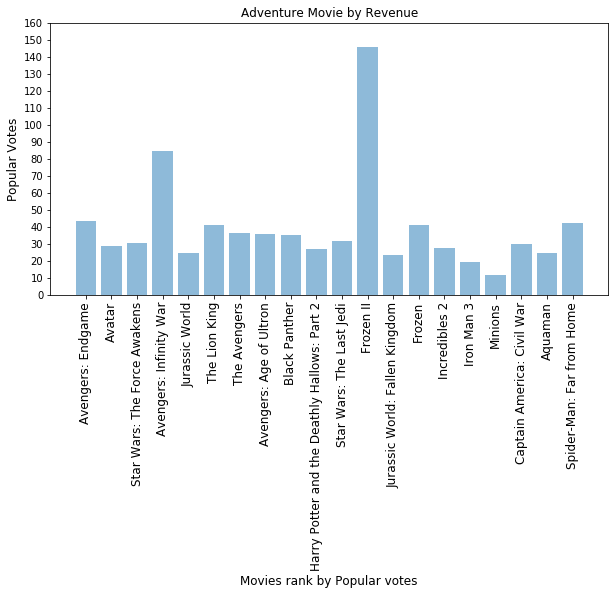

In [205]:
new_figure = plt.figure(figsize= (10,5))
objects = df_rev['title']
# y_pos = np.arange(len(objects))
popularity= df_rev['popularity']

plt.bar(objects, popularity, align='center', alpha=0.5)
plt.xticks(objects,rotation=90, rotation_mode="default", fontsize=12)
plt.yticks(np.arange(0, 170, step=10))
plt.ylabel('Popular Votes',fontsize=12)
plt.xlabel('Movies rank by Popular votes',fontsize=12)
plt.title('Adventure Movie by Revenue',fontsize=12)

plt.show()


In [51]:
revenue_com = []
for i in range(1,20):
    revenue_com.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=revenue.desc&page={i}&with_genres=35&with_original_language=en'))
#we already sorted by revenue in a desending order    
#revenure of comedy    

In [52]:
revenue_moviescom = []
# i am adding all the pages(get request) into a new list 
for page in revenue_com:
    revenue_moviescom.append(requests.get(page))

In [53]:
revenuecom_json = []
for movie in revenue_moviescom:
    revenuecom_json.append(movie.json())

In [54]:
results = []
for item in revenuecom_json:
    results = results + item['results']

In [55]:
df4 = pd.DataFrame(results)

In [56]:
df4.set_index('title', inplace = True)

In [57]:
df4.reset_index(inplace=True)

In [58]:
df4.drop(df4[df4['popularity'] < 5.0].index, inplace = True)


In [59]:
df4.head(25)

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,Minions,11.634,7780,False,/q0R4crx2SehcEEQEkYObktdeFy.jpg,211672,False,/wiSIfl9FnXYGXzUKji7Muc3Oj3o.jpg,en,Minions,"[12, 16, 35, 10751]",6.4,"Minions Stuart, Kevin and Bob are recruited by...",2015-06-17
1,Toy Story 4,33.643,3776,False,/w9kR8qbmQ01HwnvK4alvnQ2ca0L.jpg,301528,False,/m67smI1IIMmYzCl9axvKNULVKLr.jpg,en,Toy Story 4,"[12, 16, 35, 14, 10751]",7.5,Woody has always been confident about his plac...,2019-06-19
2,Toy Story 3,17.747,9657,False,/mMltbSxwEdNE4Cv8QYLpzkHWTDo.jpg,10193,False,/y2qAjM37QgatWeG84DDtwsZuMW.jpg,en,Toy Story 3,"[16, 35, 10751]",7.8,"Woody, Buzz, and the rest of Andy's toys haven...",2010-06-16
3,Aladdin,48.934,4936,False,/3iYQTLGoy7QnjcUYRJy4YrAgGvp.jpg,420817,False,/rVqY0Bo4Npf6EIONUROxjYAJfmD.jpg,en,Aladdin,"[12, 35, 14, 10749, 10751]",7.0,A kindhearted street urchin named Aladdin emba...,2019-05-22
4,Despicable Me 3,14.097,4566,False,/6t3YWl7hrr88lCEFlGVqW5yV99R.jpg,324852,False,/ftRkFtAGuHngHnLiOxktq0aCVMF.jpg,en,Despicable Me 3,"[28, 12, 16, 35, 10751]",6.3,Gru and his wife Lucy must stop former '80s ch...,2017-06-15
5,Finding Dory,15.186,8640,False,/z09QAf8WbZncbitewNk6lKYMZsh.jpg,127380,False,/3iSCdXjDmY3DuEOUYsElu35vQU6.jpg,en,Finding Dory,"[12, 16, 35, 10751]",7.0,Dory is reunited with her friends Nemo and Mar...,2016-06-16
6,Zootopia,40.731,11113,False,/sM33SANp9z6rXW8Itn7NnG1GOEs.jpg,269149,False,/mhdeE1yShHTaDbJVdWyTlzFvNkr.jpg,en,Zootopia,"[16, 12, 10751, 35]",7.7,"Determined to prove herself, Officer Judy Hopp...",2016-02-11
8,Despicable Me 2,29.028,7989,False,/kQrYyZQHkwkUg2KlUDyvymj9FAp.jpg,93456,False,/rmgxcw8tGTmdhsWqdjGBS9uI1tO.jpg,en,Despicable Me 2,"[16, 35, 10751]",6.9,Gru is recruited by the Anti-Villain League to...,2013-06-25
9,Jumanji: Welcome to the Jungle,26.040,8610,False,/22hqf97LadMvkd4zDi3Bq25xSqD.jpg,353486,False,/rz3TAyd5kmiJmozp3GUbYeB5Kep.jpg,en,Jumanji: Welcome to the Jungle,"[28, 12, 35, 14]",6.7,The tables are turned as four teenagers are su...,2017-12-09
10,Shrek 2,14.999,7112,False,/eVBH2nDYbLWiUXYotADRAWK6sm6.jpg,809,False,/gdFAYLb5NR5HqcEKnPloOM6fX4B.jpg,en,Shrek 2,"[12, 16, 35, 10751, 14]",7.0,"Shrek, Fiona and Donkey set off to Far, Far Aw...",2004-05-19


In [60]:
df4.describe()

,popularity,vote_count,id,vote_average
count,375.000000,375.000000,375.000000,375.000000
mean,16.269373,3543.013333,86963.925333,6.488800
std,18.532256,3017.592377,131800.247891,0.667129
min,5.569000,403.000000,13.000000,4.300000
25%,10.666000,1588.000000,6017.000000,6.000000
50%,12.446000,2491.000000,11395.000000,6.400000
75%,16.263000,4392.000000,109447.000000,6.900000
max,267.705000,21911.000000,546554.000000,8.400000


In [61]:
df_revcom = df4[['title','popularity']].head(20) 
df_revcom

,title,popularity
0,Minions,11.634
1,Toy Story 4,33.643
2,Toy Story 3,17.747
3,Aladdin,48.934
4,Despicable Me 3,14.097
5,Finding Dory,15.186
6,Zootopia,40.731
8,Despicable Me 2,29.028
9,Jumanji: Welcome to the Jungle,26.040
10,Shrek 2,14.999


In [137]:
df_revcom.describe()

,popularity
count,20.000000
mean,24.251600
std,11.319522
min,5.698000
25%,14.921000
50%,23.123000
75%,32.491000
max,48.934000


In [62]:
df_revcom['title']

0                                              Minions
1                                          Toy Story 4
2                                          Toy Story 3
3                                              Aladdin
4                                      Despicable Me 3
5                                         Finding Dory
6                                             Zootopia
8                                      Despicable Me 2
9                       Jumanji: Welcome to the Jungle
10                                             Shrek 2
11                      Ice Age: Dawn of the Dinosaurs
12                          Ice Age: Continental Drift
13                             The Secret Life of Pets
14                      Guardians of the Galaxy Vol. 2
15                                          Inside Out
16                                      Thor: Ragnarok
17                                                Coco
18                                     Shrek the Third
19    Pira

In [63]:
df_revcom.drop(df_revcom[df_revcom['popularity'] < 5.0].index, inplace = True)


In [64]:
df_revcom['popularity']

0     11.634
1     33.643
2     17.747
3     48.934
4     14.097
5     15.186
6     40.731
8     29.028
9     26.040
10    14.999
11    14.392
12    14.687
13     5.698
14    30.995
15    36.331
16    34.876
17    26.338
18    17.363
19    20.206
20    32.107
Name: popularity, dtype: float64

In [65]:
df_revcom['title']

0                                              Minions
1                                          Toy Story 4
2                                          Toy Story 3
3                                              Aladdin
4                                      Despicable Me 3
5                                         Finding Dory
6                                             Zootopia
8                                      Despicable Me 2
9                       Jumanji: Welcome to the Jungle
10                                             Shrek 2
11                      Ice Age: Dawn of the Dinosaurs
12                          Ice Age: Continental Drift
13                             The Secret Life of Pets
14                      Guardians of the Galaxy Vol. 2
15                                          Inside Out
16                                      Thor: Ragnarok
17                                                Coco
18                                     Shrek the Third
19    Pira

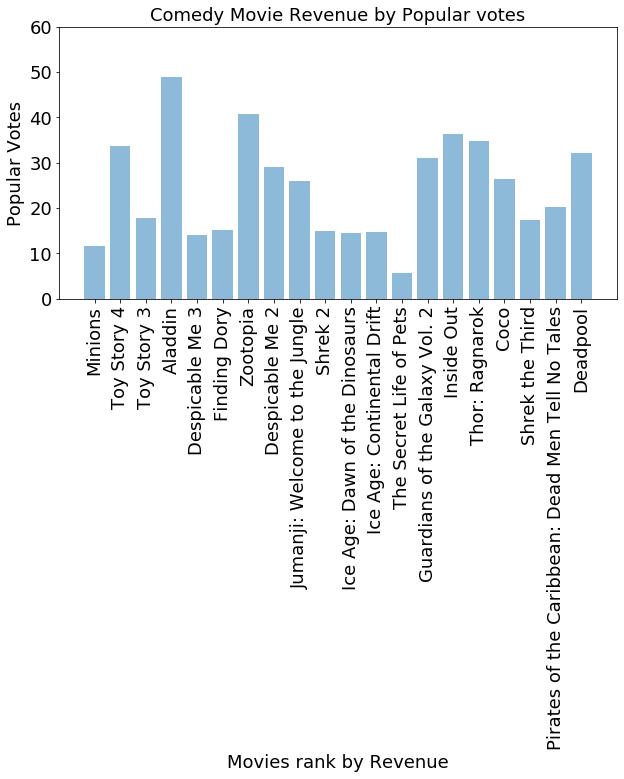

In [207]:
new_figure = plt.figure(figsize= (10,5))
objects = df_revcom['title']
# y_pos = np.arange(len(objects))
popularity= df_revcom['popularity']

plt.bar(objects, popularity, align='center', alpha=0.5)
plt.xticks(objects,rotation=90, rotation_mode="default", fontsize= 18)
plt.yticks(np.arange(0, 70, step=10),fontsize= 18)
plt.ylabel('Popular Votes',fontsize= 18)
plt.xlabel('Movies rank by Revenue',fontsize= 18)
plt.title('Comedy Movie Revenue by Popular votes',fontsize= 18)

plt.show()


In [67]:
id_list=list(df3['id'].values)

In [68]:
budget_adv = []
for movieid in id_list:
    budget_adv.append(str(f'https://api.themoviedb.org/3/movie/{movieid}?api_key={config.api_key}&language=en-US'))
   

In [138]:
#budget_adv 

In [70]:
budget_movies = []
# i am adding all the pages(get request) into a new list 
for page in budget_adv:
    budget_movies.append(requests.get(page))

In [71]:
budget_json = []
for movie in budget_movies:
    budget_json.append(movie.json())

In [139]:
#budget_json

In [73]:
dfbu = pd.DataFrame(budget_json)

In [74]:
dfbu.set_index('title', inplace = True)

In [75]:
dfbu.reset_index(inplace=True)

In [76]:
dfbu.reset_index(inplace= True)

In [77]:
dfbu.drop(columns=['index'] , inplace= True)

In [78]:
dfbu

,title,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,Avengers: Endgame,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2797800564,181,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Part of the journey is the end.,False,8.3,11420
1,Avatar,False,/aHcth2AXzZSjhX7JYh7ie73YVNc.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,False,7.4,20401
2,Star Wars: The Force Awakens,False,/c2Ax8Rox5g6CneChwy1gmu4UbSb.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2068223624,136,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a story.,False,7.4,13872
3,Avengers: Infinity War,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2046239637,149,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An entire universe. Once and for all.,False,8.3,16908
4,Jurassic World,False,/t5KONotASgVKq4N19RyhIthWOPG.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,tt0369610,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-06,1671713208,124,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The park is open.,False,6.6,15090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Storks,False,/yziCg46YIvmWAvPdztuZQqNBinW.jpg,None,70000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.storks-movie.net/,332210,tt4624424,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-09-22,182379278,87,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Find Your Flock,False,6.6,1470
363,Poseidon,False,/tUGSLoMcxNWZ0OIRSqDaB2jNbdE.jpg,None,160000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www2.warnerbros.com/poseidon/,503,tt0409182,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2006-05-10,181674817,99,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Mayday,False,5.7,1176
364,Scooby-Doo 2: Monsters Unleashed,False,/2vRVzvqY0tydcStBkNn73JPPOPL.jpg,"{'id': 86860, 'name': 'Scooby-Doo Collection',...",0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 14, '...",,11024,tt0331632,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2004-03-24,181466833,93,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They came. They saw. They ran.,False,5.7,1472
365,Allegiant,False,/p1dkPKpHJ32FvhKZSAUdA1JSYFi.jpg,"{'id': 283579, 'name': 'Divergent Collection',...",110000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",http://www.thedivergentseries.movie/#allegiant,262504,tt3410834,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-03-09,179246868,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Break the boundaries of your world,False,6.0,4578


In [79]:
dfbu['belongs_to_collection'].head(20)

0     {'id': 86311, 'name': 'The Avengers Collection...
1     {'id': 87096, 'name': 'Avatar Collection', 'po...
2     {'id': 10, 'name': 'Star Wars Collection', 'po...
3     {'id': 86311, 'name': 'The Avengers Collection...
4     {'id': 328, 'name': 'Jurassic Park Collection'...
5                                                  None
6     {'id': 86311, 'name': 'The Avengers Collection...
7     {'id': 86311, 'name': 'The Avengers Collection...
8     {'id': 529892, 'name': 'Black Panther Collecti...
9     {'id': 1241, 'name': 'Harry Potter Collection'...
10    {'id': 10, 'name': 'Star Wars Collection', 'po...
11    {'id': 386382, 'name': 'Frozen Collection', 'p...
12    {'id': 328, 'name': 'Jurassic Park Collection'...
13    {'id': 386382, 'name': 'Frozen Collection', 'p...
14    {'id': 468222, 'name': 'The Incredibles Collec...
15    {'id': 131292, 'name': 'Iron Man Collection', ...
16    {'id': 544669, 'name': 'Minions Collection', '...
17    {'id': 131295, 'name': 'Captain America Co

In [181]:
dfbu

,title,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,Avengers: Endgame,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2797800564,181,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Part of the journey is the end.,False,8.3,11420
1,Avatar,False,/aHcth2AXzZSjhX7JYh7ie73YVNc.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,False,7.4,20401
2,Star Wars: The Force Awakens,False,/c2Ax8Rox5g6CneChwy1gmu4UbSb.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2068223624,136,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a story.,False,7.4,13872
3,Avengers: Infinity War,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2046239637,149,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An entire universe. Once and for all.,False,8.3,16908
4,Jurassic World,False,/t5KONotASgVKq4N19RyhIthWOPG.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,tt0369610,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-06,1671713208,124,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The park is open.,False,6.6,15090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Storks,False,/yziCg46YIvmWAvPdztuZQqNBinW.jpg,None,70000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.storks-movie.net/,332210,tt4624424,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-09-22,182379278,87,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Find Your Flock,False,6.6,1470
363,Poseidon,False,/tUGSLoMcxNWZ0OIRSqDaB2jNbdE.jpg,None,160000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www2.warnerbros.com/poseidon/,503,tt0409182,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2006-05-10,181674817,99,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Mayday,False,5.7,1176
364,Scooby-Doo 2: Monsters Unleashed,False,/2vRVzvqY0tydcStBkNn73JPPOPL.jpg,"{'id': 86860, 'name': 'Scooby-Doo Collection',...",0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 14, '...",,11024,tt0331632,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2004-03-24,181466833,93,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They came. They saw. They ran.,False,5.7,1472
365,Allegiant,False,/p1dkPKpHJ32FvhKZSAUdA1JSYFi.jpg,"{'id': 283579, 'name': 'Divergent Collection',...",110000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",http://www.thedivergentseries.movie/#allegiant,262504,tt3410834,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-03-09,179246868,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Break the boundaries of your world,False,6.0,4578


In [156]:
adv_run= dfbu[['title','runtime']].head(20)
adv_run

,title,runtime
0,Avengers: Endgame,181
1,Avatar,162
2,Star Wars: The Force Awakens,136
3,Avengers: Infinity War,149
4,Jurassic World,124
5,The Lion King,118
6,The Avengers,143
7,Avengers: Age of Ultron,141
8,Black Panther,134
9,Harry Potter and the Deathly Hallows: Part 2,130


In [157]:
adv_run['title']

0                                Avengers: Endgame
1                                           Avatar
2                     Star Wars: The Force Awakens
3                           Avengers: Infinity War
4                                   Jurassic World
5                                    The Lion King
6                                     The Avengers
7                          Avengers: Age of Ultron
8                                    Black Panther
9     Harry Potter and the Deathly Hallows: Part 2
10                        Star Wars: The Last Jedi
11                                       Frozen II
12                  Jurassic World: Fallen Kingdom
13                                          Frozen
14                                   Incredibles 2
15                                      Iron Man 3
16                                         Minions
17                      Captain America: Civil War
18                                         Aquaman
19                       Spider

In [158]:
adv_run['runtime']

0     181
1     162
2     136
3     149
4     124
5     118
6     143
7     141
8     134
9     130
10    152
11    104
12    129
13    102
14    118
15    131
16     91
17    147
18    144
19    129
Name: runtime, dtype: int64

In [179]:
adv_run.describe()

,runtime
count,20.000000
mean,133.250000
std,21.018476
min,91.000000
25%,122.500000
50%,132.500000
75%,144.750000
max,181.000000


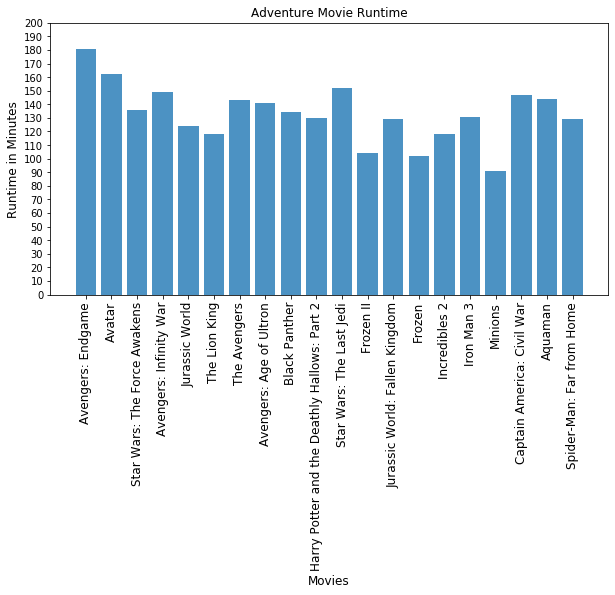

In [209]:
new_figure = plt.figure(figsize= (10,5))
objects = adv_run['title']
# y_pos = np.arange(len(objects))
runtime= adv_run['runtime']

plt.bar(objects, runtime, align='center', alpha=0.8)
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
plt.yticks(np.arange(0, 210, step=10))
plt.ylabel('Runtime in Minutes',fontsize=12)
plt.xlabel('Movies',fontsize=12)
plt.title('Adventure Movie Runtime',fontsize=12)

plt.show()

In [81]:
adv_budget= dfbu[['title','budget']].head(20)
adv_budget

,title,budget
0,Avengers: Endgame,356000000
1,Avatar,237000000
2,Star Wars: The Force Awakens,245000000
3,Avengers: Infinity War,300000000
4,Jurassic World,150000000
5,The Lion King,260000000
6,The Avengers,220000000
7,Avengers: Age of Ultron,280000000
8,Black Panther,200000000
9,Harry Potter and the Deathly Hallows: Part 2,125000000


In [140]:
adv_budget.describe()

,budget
count,2.000000e+01
mean,1.980000e+08
std,7.544255e+07
min,3.300000e+07
25%,1.575000e+08
50%,2.000000e+08
75%,2.412500e+08
max,3.560000e+08


In [82]:
adv_budget['title']

0                                Avengers: Endgame
1                                           Avatar
2                     Star Wars: The Force Awakens
3                           Avengers: Infinity War
4                                   Jurassic World
5                                    The Lion King
6                                     The Avengers
7                          Avengers: Age of Ultron
8                                    Black Panther
9     Harry Potter and the Deathly Hallows: Part 2
10                        Star Wars: The Last Jedi
11                                       Frozen II
12                  Jurassic World: Fallen Kingdom
13                                          Frozen
14                                   Incredibles 2
15                                      Iron Man 3
16                                         Minions
17                      Captain America: Civil War
18                                         Aquaman
19                       Spider

In [83]:
adv_budget['budget']

0     356000000
1     237000000
2     245000000
3     300000000
4     150000000
5     260000000
6     220000000
7     280000000
8     200000000
9     125000000
10    200000000
11     33000000
12    170000000
13    150000000
14    200000000
15    200000000
16     74000000
17    240000000
18    160000000
19    160000000
Name: budget, dtype: int64

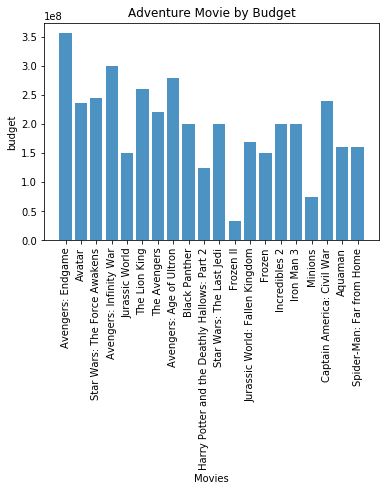

In [142]:
objects = adv_budget['title']
# y_pos = np.arange(len(objects))
budget= adv_budget['budget']

plt.bar(objects, budget, align='center', alpha=0.8)
plt.xticks(objects,rotation=90, rotation_mode="default")
#plt.yticks(np.arange(0, 356000000)) #step=10000 
plt.ylabel('budget')
plt.xlabel('Movies')
plt.title('Adventure Movie by Budget')

plt.show()

In [85]:
id_listcom=list(df4['id'].values)

In [86]:
budget_com = []
for movieid in id_listcom:
    budget_com.append(str(f'https://api.themoviedb.org/3/movie/{movieid}?api_key={config.api_key}&language=en-US'))
   

In [87]:
budget_comedymovies = []
# i am adding all the pages(get request) into a new list 
for page in budget_com:
    budget_comedymovies.append(requests.get(page))

In [88]:
budgetcomedy_json = []
for movie in budget_comedymovies:
    budgetcomedy_json.append(movie.json())

In [89]:
dfcomedybudget = pd.DataFrame(budgetcomedy_json)

In [90]:
dfcomedybudget.set_index('title', inplace = True)

In [91]:
dfcomedybudget.reset_index(inplace=True)

In [92]:
dfcomedybudget

,title,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,Minions,False,/wiSIfl9FnXYGXzUKji7Muc3Oj3o.jpg,"{'id': 544669, 'name': 'Minions Collection', '...",74000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.minionsmovie.com/,211672,tt2293640,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-17,1156730962,91,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Before Gru, they had a history of bad bosses",False,6.4,7781
1,Toy Story 4,False,/m67smI1IIMmYzCl9axvKNULVKLr.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",175000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",https://www.pixar.com/feature-films-toy-story-4,301528,tt1979376,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-06-19,1073394593,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Get Ready to Hit the Road,False,7.5,3780
2,Toy Story 3,False,/y2qAjM37QgatWeG84DDtwsZuMW.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",200000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/toystory/,10193,tt0435761,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-06-16,1066969703,103,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No toy gets left behind.,False,7.8,9657
3,Aladdin,False,/rVqY0Bo4Npf6EIONUROxjYAJfmD.jpg,None,183000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://movies.disney.com/aladdin-2019,420817,tt6139732,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-05-22,1047612394,128,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Choose Wisely.,False,7.0,4938
4,Despicable Me 3,False,/ftRkFtAGuHngHnLiOxktq0aCVMF.jpg,"{'id': 86066, 'name': 'Despicable Me Collectio...",80000000,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",http://www.despicable.me,324852,tt3469046,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2017-06-15,1031552585,96,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Oh brother.,False,6.3,4566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,Big,False,/tVpkaXfP5xCS2Fd19JijUSDvpbg.jpg,None,18000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",,2280,tt0094737,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1988-06-03,151927281,104,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Have you ever had a really big secret?,False,7.1,2073
371,Jackass Presents: Bad Grandpa,False,/qPxbuKexc8842G6rPrQb3PV9cKq.jpg,None,15000000,"[{'id': 35, 'name': 'Comedy'}]",,208134,tt3063516,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2013-10-22,151831537,92,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Real people. Real reactions. Real messed up.,False,6.0,1010
372,Planes: Fire & Rescue,False,/3MET6hEfk8n8i0KFRq9BHnJq7ju.jpg,"{'id': 270252, 'name': 'Planes Collection', 'p...",50000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://movies.disney.com/planes-fire-and-rescue,218836,tt2980706,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2014-07-17,151165787,83,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"When others fly out, heroes fly in.",False,6.0,469
373,Midnight in Paris,False,/7sIDEHnw51k7Him2fEtA70I1OBw.jpg,None,30000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",http://www.sonyclassics.com/midnightinparis,59436,tt1605783,en,...,"[{'iso_3166_1': 'ES', 'name': 'Spain'}, {'iso_...",2011-05-11,151119219,94,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,,False,7.5,4543


In [93]:
dfcomedybudget__ = dfcomedybudget[['title','budget']].head(20) 
dfcomedybudget__ 

,title,budget
0,Minions,74000000
1,Toy Story 4,175000000
2,Toy Story 3,200000000
3,Aladdin,183000000
4,Despicable Me 3,80000000
5,Finding Dory,200000000
6,Zootopia,150000000
7,Despicable Me 2,76000000
8,Jumanji: Welcome to the Jungle,90000000
9,Shrek 2,150000000


In [143]:
dfcomedybudget__.describe()

,budget
count,2.000000e+01
mean,1.408000e+08
std,5.459767e+07
min,5.800000e+07
25%,8.750000e+07
50%,1.550000e+08
75%,1.807500e+08
max,2.300000e+08


In [94]:
dfcomedybudget__['title']

0                                              Minions
1                                          Toy Story 4
2                                          Toy Story 3
3                                              Aladdin
4                                      Despicable Me 3
5                                         Finding Dory
6                                             Zootopia
7                                      Despicable Me 2
8                       Jumanji: Welcome to the Jungle
9                                              Shrek 2
10                      Ice Age: Dawn of the Dinosaurs
11                          Ice Age: Continental Drift
12                             The Secret Life of Pets
13                      Guardians of the Galaxy Vol. 2
14                                          Inside Out
15                                      Thor: Ragnarok
16                                                Coco
17                                     Shrek the Third
18    Pira

In [95]:
dfcomedybudget__['budget']

0      74000000
1     175000000
2     200000000
3     183000000
4      80000000
5     200000000
6     150000000
7      76000000
8      90000000
9     150000000
10     90000000
11     95000000
12     75000000
13    200000000
14    175000000
15    180000000
16    175000000
17    160000000
18    230000000
19     58000000
Name: budget, dtype: int64

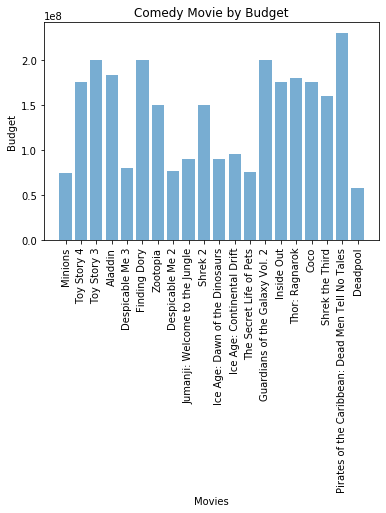

In [144]:
objects = dfcomedybudget__['title']
# y_pos = np.arange(len(objects))
budget= dfcomedybudget__['budget']

plt.bar(objects, budget, align='center', alpha=0.6)
plt.xticks(objects,rotation=90, rotation_mode="default")
#plt.yticks(np.arange(0, 356000000)) #step=10000 
plt.ylabel('Budget')
plt.xlabel('Movies')
plt.title('Comedy Movie by Budget')

plt.show()


In [171]:
comrun = dfcomedybudget[['title','runtime']].head(20)
comrun

,title,runtime
0,Minions,91
1,Toy Story 4,100
2,Toy Story 3,103
3,Aladdin,128
4,Despicable Me 3,96
5,Finding Dory,97
6,Zootopia,109
7,Despicable Me 2,98
8,Jumanji: Welcome to the Jungle,119
9,Shrek 2,93


In [172]:
comrun['title']

0                                              Minions
1                                          Toy Story 4
2                                          Toy Story 3
3                                              Aladdin
4                                      Despicable Me 3
5                                         Finding Dory
6                                             Zootopia
7                                      Despicable Me 2
8                       Jumanji: Welcome to the Jungle
9                                              Shrek 2
10                      Ice Age: Dawn of the Dinosaurs
11                          Ice Age: Continental Drift
12                             The Secret Life of Pets
13                      Guardians of the Galaxy Vol. 2
14                                          Inside Out
15                                      Thor: Ragnarok
16                                                Coco
17                                     Shrek the Third
18    Pira

In [173]:
comrun['runtime']

0      91
1     100
2     103
3     128
4      96
5      97
6     109
7      98
8     119
9      93
10     94
11     88
12     87
13    137
14     95
15    131
16    105
17     93
18    129
19    108
Name: runtime, dtype: int64

In [178]:
comrun.describe()

,runtime
count,20.000000
mean,105.050000
std,15.503735
min,87.000000
25%,93.750000
50%,99.000000
75%,111.500000
max,137.000000


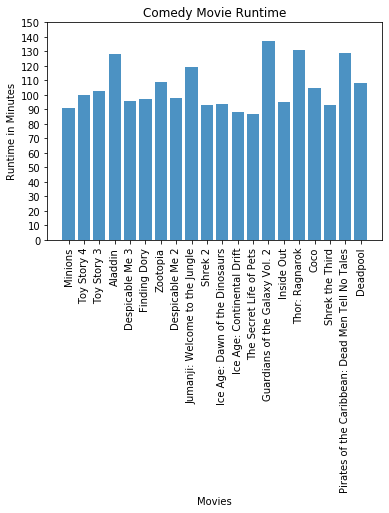

In [182]:
objects = comrun['title']
# y_pos = np.arange(len(objects))
runtime= comrun['runtime']

plt.bar(objects, runtime, align='center', alpha=0.8)
plt.xticks(objects,rotation=90, rotation_mode="default")
plt.yticks(np.arange(0, 160, step=10))
plt.ylabel('Runtime in Minutes')
plt.xlabel('Movies')
plt.title('Comedy Movie Runtime')

plt.show()